#  Linear Regression

## Required Libraries 

In [61]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

from sklearn import linear_model as lin
from sklearn import model_selection as mod
from sklearn import metrics as met
from sklearn import preprocessing as pre
from sklearn import pipeline as pip

## Data & Basic Details 

In [62]:
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

In [63]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [81]:
df_hour.head(60)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [64]:
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [65]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [66]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [67]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Data Preprocessing

Our data is clear and interaptable. Therefore we don't need to make any preprocessing step. 

## Data Visualization

### Correlation Between Features

#### For Day dataframe

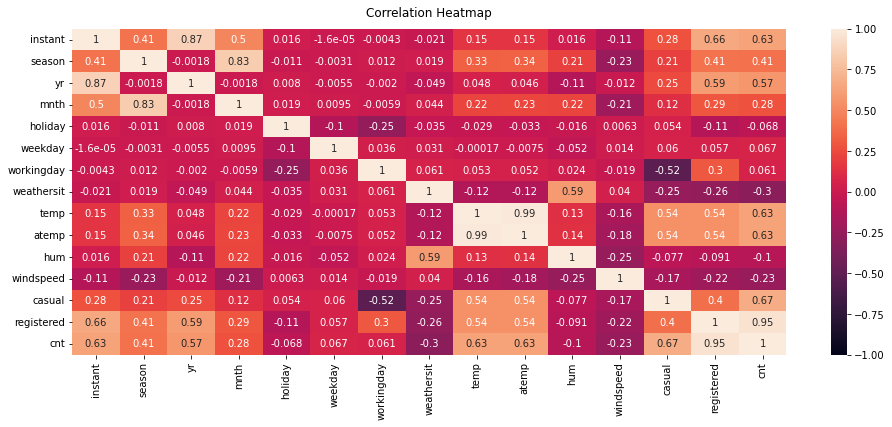

In [68]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_day.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


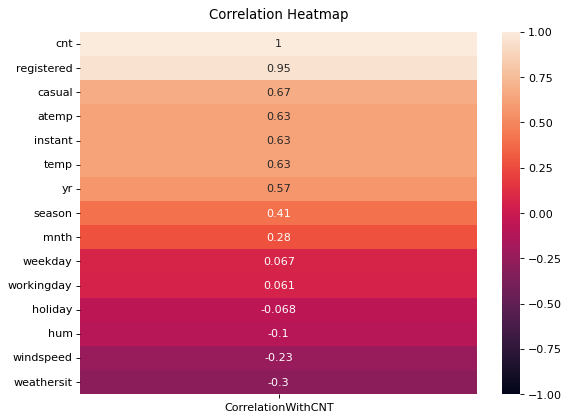

In [69]:
df_cnt_corr_day = pd.DataFrame(df_day.corr()["cnt"].sort_values(ascending=False))
df_cnt_corr_day.columns=["CorrelationWithCNT"]
plt.figure(figsize=(8, 6), dpi=80)
heatmap = sns.heatmap(df_cnt_corr_day, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### For Hour dataframe

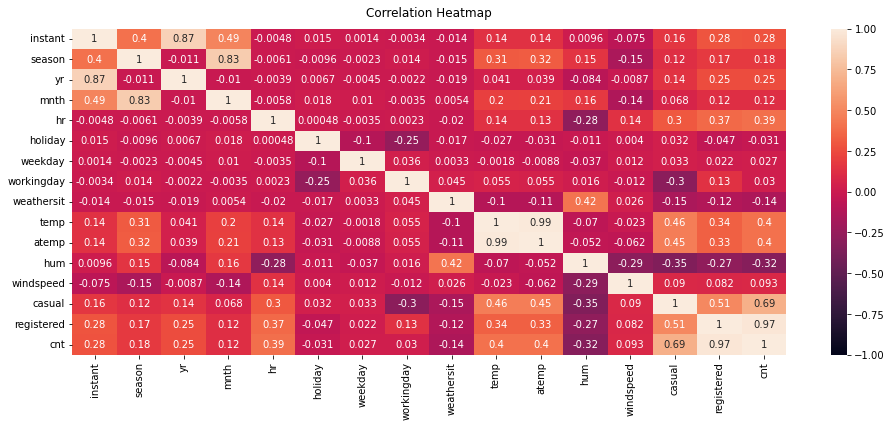

In [70]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_hour.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


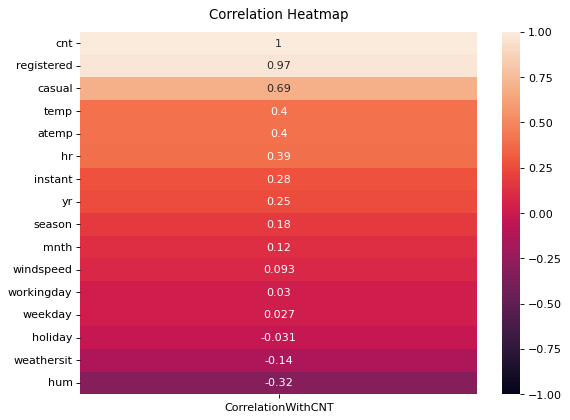

In [71]:
df_cnt_corr_hour = pd.DataFrame(df_hour.corr()["cnt"].sort_values(ascending=False))
df_cnt_corr_hour.columns=["CorrelationWithCNT"]
plt.figure(figsize=(8, 6), dpi=80)
heatmap = sns.heatmap(df_cnt_corr_hour, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

I've choose hourly data for machine learning model. After that, I'll just show details of hourly data.

In [72]:
df_hour_numeric = df_hour.select_dtypes(exclude=['object'])

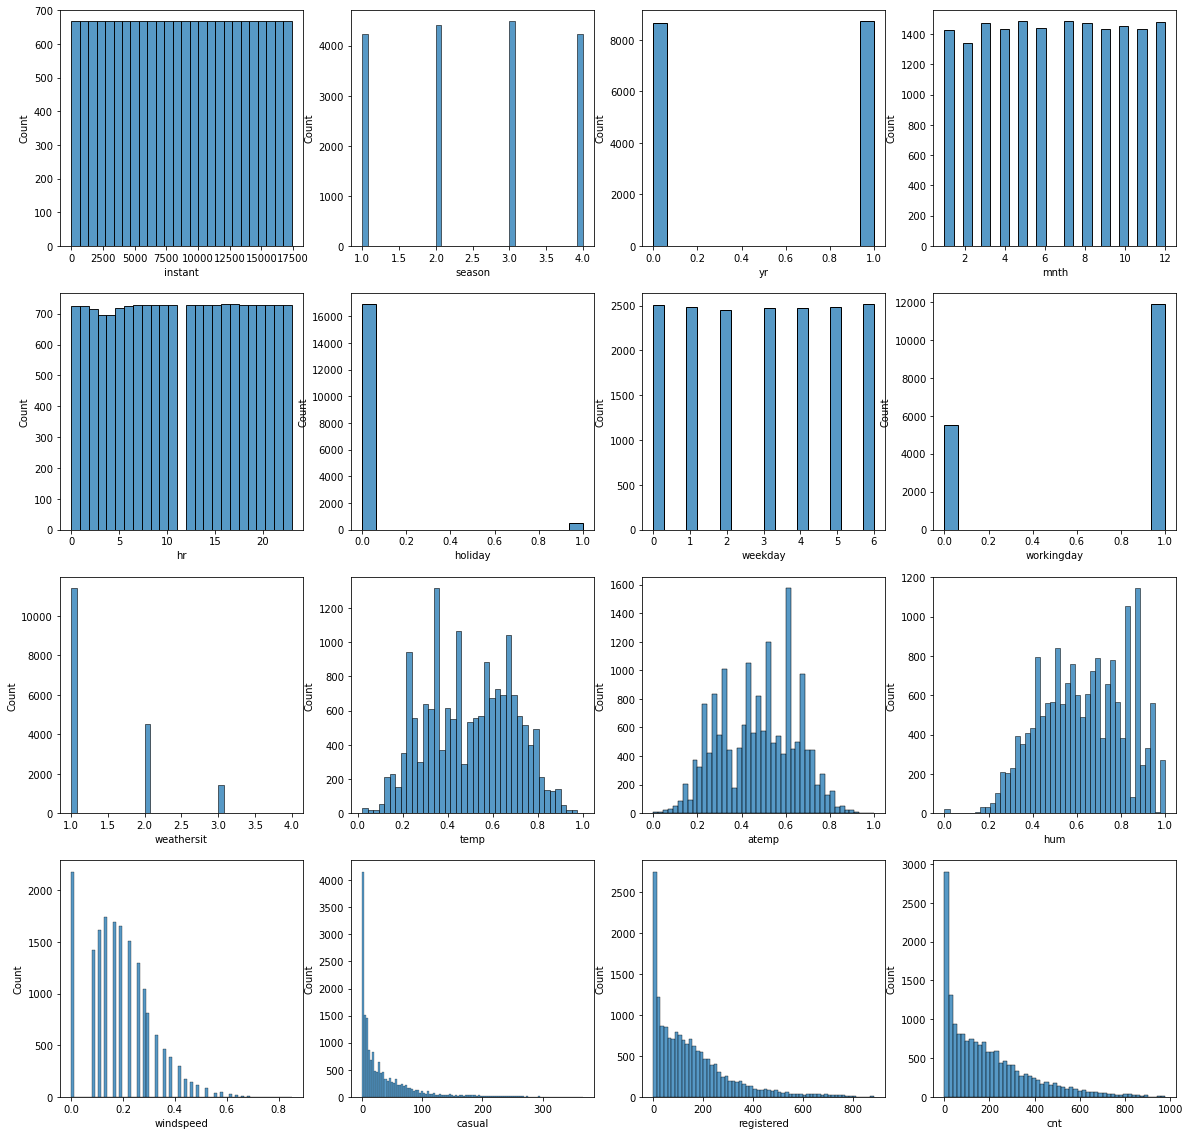

In [73]:
n_rows=4
n_cols=4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 20))
for i, column in enumerate(df_hour_numeric.columns):
    sns.histplot(df_hour_numeric[column],ax=axes[i//n_cols,i%n_cols])    
plt.show()

## Machine Learning Steps

In [83]:
X = df_hour.drop(["cnt","dteday"],axis=1)
y = df_hour["cnt"]

In [84]:
print(str(X.shape) + ' --> Shape of X')
print(str(y.shape) + ' --> Shape of y')

(17379, 15) --> Shape of X
(17379,) --> Shape of y


In [85]:
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
print(str(X_train.shape) + ' --> Shape of X_train')
print(str(X_test.shape) + ' --> Shape of X_test')
print(str(y_train.shape) + ' --> Shape of y_train')
print(str(y_test.shape) + ' --> Shape of y_test')


(11643, 15) --> Shape of X_train
(5736, 15) --> Shape of X_test
(11643,) --> Shape of y_train
(5736,) --> Shape of y_test


In [87]:
pipe = pip.Pipeline([
            ("scaler", pre.StandardScaler()), # fit & transform
            ("reg", lin.SGDRegressor(max_iter=100)) # fit
])

pipe.fit(X_train, y_train.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', SGDRegressor(max_iter=100))])

In [88]:
y_pred = pipe.predict(X_test)
y_pred

array([424.91590113,  87.97441145,   3.98494946, ..., 161.00145764,
       633.91708967, 115.99287572])

In [90]:
met.mean_squared_error(y_test, y_pred, squared=False)

0.06713783002982793

In [92]:

pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("reg", lin.SGDRegressor())
])

mod.cross_val_score(pipe, X_train, y_train.ravel(), scoring="neg_root_mean_squared_error", cv=3)

array([-0.05817314, -0.05531972, -0.06345055])

In [94]:
pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("reg", lin.SGDRegressor(random_state=42))
])

params = {
    "reg__penalty": ["l1"],
    "reg__alpha": [0.0001, 0.0002, 0.0003],
    "reg__eta0": [0.1, 0.2, 0.3]
}

grid = mod.GridSearchCV(pipe, params, scoring="neg_root_mean_squared_error", cv=3)
grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('reg', SGDRegressor(random_state=42))]),
             param_grid={'reg__alpha': [0.0001, 0.0002, 0.0003],
                         'reg__eta0': [0.1, 0.2, 0.3], 'reg__penalty': ['l1']},
             scoring='neg_root_mean_squared_error')

In [95]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg__alpha,param_reg__eta0,param_reg__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025002,0.005386,0.001667,4.791264e-04,0.0001,0.1,l1,"{'reg__alpha': 0.0001, 'reg__eta0': 0.1, 'reg_...",-0.020412,-0.011934,-0.019059,-0.017135,0.003719,3
1,0.019331,0.003299,0.002001,3.893359e-07,0.0001,0.2,l1,"{'reg__alpha': 0.0001, 'reg__eta0': 0.2, 'reg_...",-0.035436,-0.024942,-0.027250,-0.029209,0.004503,6
2,0.263365,0.022306,0.001662,4.764767e-04,0.0001,0.3,l1,"{'reg__alpha': 0.0001, 'reg__eta0': 0.3, 'reg_...",-0.089393,-0.083136,-0.093578,-0.088702,0.004291,9
3,0.017315,0.000932,0.002001,1.381091e-06,0.0002,0.1,l1,"{'reg__alpha': 0.0002, 'reg__eta0': 0.1, 'reg_...",-0.017686,-0.009569,-0.017125,-0.014793,0.003701,2
4,0.020010,0.001407,0.001668,4.725549e-04,0.0002,0.2,l1,"{'reg__alpha': 0.0002, 'reg__eta0': 0.2, 'reg_...",-0.031440,-0.021246,-0.023699,-0.025462,0.004344,5
5,0.263691,0.026805,0.001975,1.721720e-05,0.0002,0.3,l1,"{'reg__alpha': 0.0002, 'reg__eta0': 0.3, 'reg_...",-0.090381,-0.077473,-0.087812,-0.085222,0.005579,8
6,0.019665,0.000945,0.002001,8.920806e-07,0.0003,0.1,l1,"{'reg__alpha': 0.0003, 'reg__eta0': 0.1, 'reg_...",-0.014801,-0.007201,-0.015193,-0.012398,0.003679,1
7,0.020988,0.000831,0.002011,1.402015e-05,0.0003,0.2,l1,"{'reg__alpha': 0.0003, 'reg__eta0': 0.2, 'reg_...",-0.027585,-0.017613,-0.020164,-0.021787,0.004229,4
8,0.273046,0.019292,0.001984,2.139961e-05,0.0003,0.3,l1,"{'reg__alpha': 0.0003, 'reg__eta0': 0.3, 'reg_...",-0.084356,-0.077818,-0.081708,-0.081294,0.002685,7


In [97]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg',
                 SGDRegressor(alpha=0.0003, eta0=0.1, penalty='l1',
                              random_state=42))])

In [98]:
grid.best_score_

-0.012398359309079116

In [100]:
y_pred = grid.best_estimator_.predict(X_test)
met.mean_squared_error(y_test, y_pred, squared=False)

0.03367296520125561

Learning Curve

In [107]:
def plotLearningCurveRegression(est, X_train, y_train, X_test, y_test, y_lower=0, y_upper=1):
  x_values = []
  y_values_train = []
  y_values_test = []

  for j in np.linspace(25, len(X_train), 20):
    i = int(j)
    x_values.append(i)

    X_train_sample = X_train[:i]
    y_train_sample = y_train[:i]

    # compose the model with current train data
    est.fit(X_train_sample, y_train_sample)

    # calcualte train score
    y_pred_train = est.predict(X_train_sample)
    train_score =  met.mean_squared_error(y_train_sample, y_pred_train, squared=False)
    y_values_train.append(train_score)

    # calculate test score
    y_pred_test = est.predict(X_test)
    test_score = met.mean_squared_error(y_test, y_pred_test, squared=False)
    y_values_test.append(test_score)
  
  plt.plot(x_values, y_values_train, label="train")
  plt.plot(x_values, y_values_test, label="test")
  plt.xlabel("Train Size")
  plt.ylabel("RMSE Score")
  plt.legend()
  plt.grid(True)
  plt.ylim(y_lower, y_upper)
  plt.show()

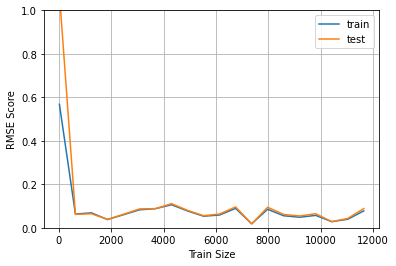

In [108]:
pipe = pip.Pipeline([
            ("scaler", pre.StandardScaler()),
            ("regressor", lin.SGDRegressor(random_state=42))
])

plotLearningCurveRegression(pipe, X_train, y_train.ravel(), X_test, y_test.ravel())

C:\Users\SSEKERL\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


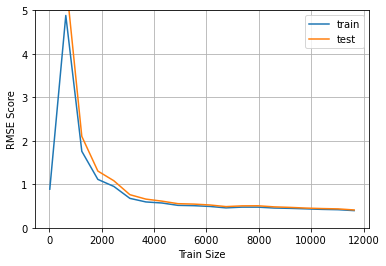

In [111]:
pipe = pip.Pipeline([
            ("poly", pre.PolynomialFeatures(degree=2)),
            ("scaler", pre.StandardScaler()),
            ("regressor", lin.SGDRegressor(random_state=42))
])

plotLearningCurveRegression(pipe, X_train, y_train.ravel(), X_test, y_test.ravel(), y_lower=0, y_upper=5)

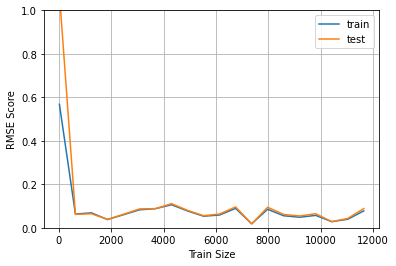

In [113]:
pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("reg", lin.SGDRegressor(random_state=42))
])

params = {
    "reg__penalty": ["l1"],
    "reg__alpha": [0.0001, 0.0002, 0.0003],
    "reg__eta0": [0.1, 0.2, 0.3]
}

grid = mod.GridSearchCV(pipe, params, scoring="neg_root_mean_squared_error", cv=3)
grid.fit(X_train, y_train.ravel())

plotLearningCurveRegression(pipe, X_train, y_train.ravel(), X_test, y_test.ravel(), y_lower=0, y_upper=1)